# Research Summary for July 18th, 2023

By Bora Basyildiz

## Imports

In [4]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols

#Plotting function for 
def genPlot(fname,df,l,m="o",msize=5):
    plt.plot(df["time"],df["fidelity"],marker=m,markersize=msize)
    plt.xlabel('$T/T_{min}$',fontsize=16)
    plt.ylabel('$F$',fontsize=16)
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)
mainDir = "../Figures/Summary_0718/"
try: #All files are stored under their gateType
    os.makedirs(mainDir)
except:
    pass 
#plt.savefig(os.path.join(os.getcwd(),mainDir,"Ashhab_Hopping.pdf"), format="pdf")

## Normalized Analysis of Max Frequency vs. Time

Here we will redo our analysis for the Max Single Qubit Drive Frequency $\Omega_{max}$ vs. the high fidelity saturation time $T_F$ where fidelity $F$ is $\geq 99\%$ at time $T_F$. Previously we did this analysis but the comparison was off due to a normlization error. Fixing this, we have

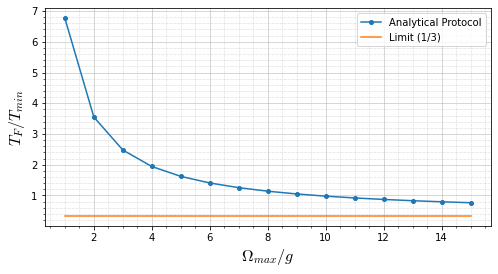

In [45]:
from numpy import arctan,sqrt,linspace,pi

npoints = 15
ttotal  = lambda g: (2*pi + 4*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

We observe that the analytical protocol has the expected same of $f(1/g)$, and it should approach the asympotic value of $(1/3)$, as we have a speed-up of $3$. Looking at the limit of our function, we have

The last point has time: 0.397660271252109


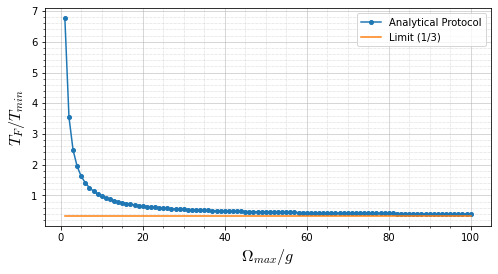

In [33]:
npoints = 10 ** 2
garr2 = linspace(1,npoints,npoints)
times2 = [ttotal(g)/(np.pi/2) for g in garr2]

print("The last point has time: " + str(times2[-1]))
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr2,times2,marker="o",markersize=4)
plt.plot(garr2, [1/3]*len(garr2))
plt.legend(["Analytical Protocol","Limit (1/3)"])

Here we see that the analytical protocol approach the correct limit as $\Omega_{max}/g\to\infty$. Now let's compare this to our numerical results 

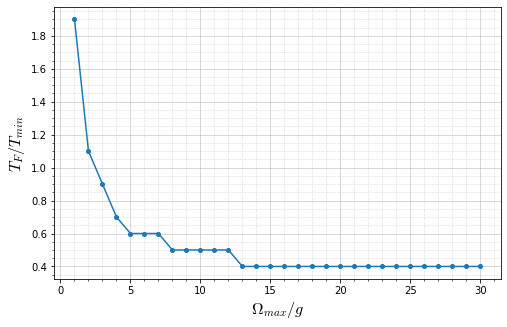

In [49]:
freq = []
times = []
for i in range(1,31):
    if i > 10: file = "../Data/PastWendianData//Qutrit_iSWAP_AnalyticalSpeedUp_M16_all_g1.0_maxT1.0_maxD" + str(i) + ".csv"
    else: file = "../Data/PastWendianData//Qutrit_iSWAP_AnalyticalSpeedUp_M16_all_g1.0_maxT3.0_maxD" + str(i) + ".csv"
    df = pd.read_csv(file,names=["fidelity","time"])
    df.sort_values(by="time",inplace=True)
    #print(df[df["fidelity"] >= 0.99]["time"].min())
    freq.append(i)
    times.append(df[df["fidelity"] >= 0.99]["time"].min())
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()

numP = 30
#plt.plot(garr[:numP],times1[:numP],"o-")
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
#plt.legend(["Analytical","Optimal Control"])
#plt.savefig(os.path.join(os.getcwd(),mainDir,"0711_ExpFreq.pdf"), format="pdf")

Here we have the results from Wendian. Now let's compare them to the previous plot.

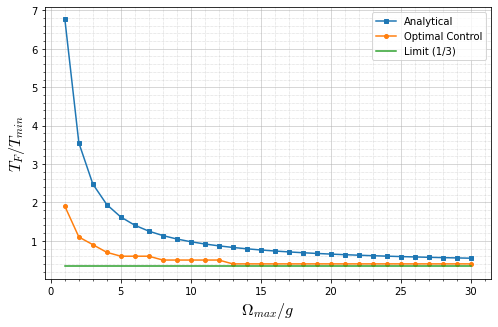

In [53]:
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr2[:numP],times2[:numP],marker="s",markersize=4)
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
plt.plot(garr2[:numP], [1/3]*len(garr2[:numP]))
plt.legend(["Analytical","Optimal Control","Limit (1/3)"])

Here we see that our optimal control converges to the limit much faster than our theoretical limit. This shows that while our optimal control may be theoretically worse than our analyitical protocol, in practice the single qutrit rotations take a significant amount of time, leading to our optimal control algorithm performing better than low max strength single qudut rotations. In the $\Omega_{max}/g$ limit, both protocols should saturate the 3x speed-up limit. 

Yet, we can improve the comparison between these two plots by accounting parallelization of the single qutrit gates. Hence one of the single qutrit drives can be done in parallel with the other, decreasing the time calculation by a factor of $2\arctan(\sqrt{2})$ leading to $$T_{total} = \frac{\pi + 2\arctan(\sqrt{2})}{g} + \pi/6.$$ Now lets redo our comparison

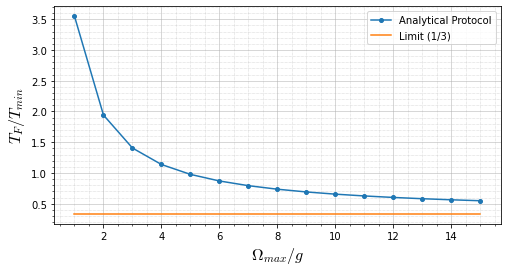

In [95]:
from numpy import arctan,sqrt,linspace,pi

npoints = 15
ttotal  = lambda g: (pi + 2*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

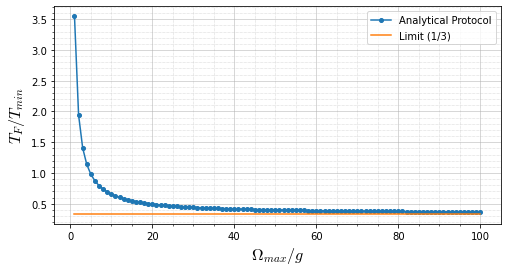

In [97]:
npoints = 10 ** 2
ttotal  = lambda g: (pi + 2*arctan(sqrt(2)))/g + pi/6
garr = linspace(1,npoints,npoints)
times1 = [ttotal(g)/(pi/2) for g in garr]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr,times1,marker="o",markersize=4)
plt.plot(garr, [1/3]*len(garr))
plt.legend(["Analytical Protocol","Limit (1/3)"])

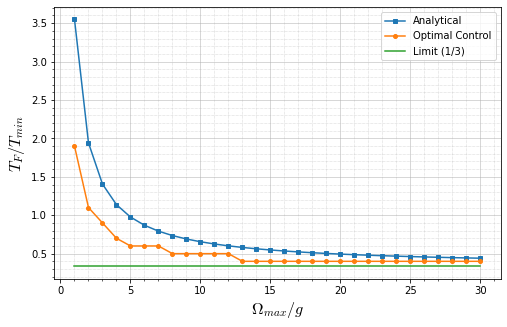

In [99]:
plt.figure(figsize=(8,5))
plt.xlabel('$\Omega_{max}/g$',fontsize=16)
plt.ylabel('$T_F/T_{min}$',fontsize=16)
#plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(garr[:numP],times1[:numP],marker="s",markersize=4)
plt.plot(freq[:numP],times[:numP],marker="o",markersize=4)
plt.plot(garr[:numP], [1/3]*len(garr[:numP]))
plt.legend(["Analytical","Optimal Control","Limit (1/3)"])

## iTwoPhonon Gate Max Frequency Analysis

Here we will look at the iTwoPhonon gate, which is the $iSWAP$ gate without the $X_2$ flip in our analytical protocol. This matrix looks like

In [94]:
# Read the CSV file using NumPy's `genfromtxt` function
data = np.genfromtxt("../Data/iTwoPhonon/iTwoPhonon.csv", delimiter=',',dtype=complex)
# Convert the data into a NumPy array
iTwoPhonon = np.array(data,dtype=complex)
print(iTwoPhonon)

# print("array([",end="")
# for i,row in enumerate(iTwoPhonon):
#     print("[",end="")
#     for j,val in enumerate(row):
#         if np.imag(val) != 0: print(int(val.imag),end="j")
#         else: print(int(val.real),end="")
#         if j != len(row)-1: print(",",end="")
#     print("]",end="")
#     if i != len(iTwoPhonon) - 1: print(",",end="")
# print("])",end="")
iTwoPhonon = np.array([[0,0,0,0,-1j,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[-1j,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]])
#print(iTwoPhonon)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


The $\Omega_{max}/g$ vs. $T_F/T_{min}$ plot for our analytical protocol will be 

\begin{align*}
    T_{total} = \frac{2\arctan(\sqrt{2})}{g} + \pi/6.
\end{align*}


which is our previous eq. without the $X_2$ $\pi/2$ angle. N 

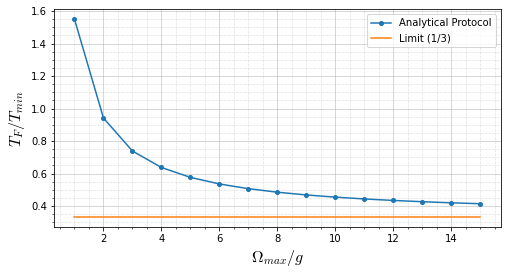

In [100]:
from numpy import arctan,sqrt,linspace,pi

twoPpoints = 15
twoPtotal  = lambda g: (2*arctan(sqrt(2)))/g + pi/6
twoPg = linspace(1,twoPpoints,twoPpoints)
twoPtimes = [twoPtotal(g)/(pi/2) for g in twoPg]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(twoPg,twoPtimes,marker="o",markersize=4)
plt.plot(twoPg, [1/3]*len(twoPg))
plt.legend(["Analytical Protocol","Limit (1/3)"])

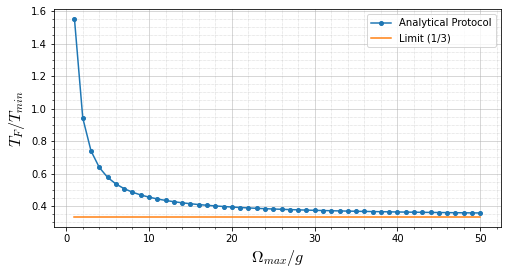

In [102]:
twoPpoints = 50
twoPtotal  = lambda g: (2*arctan(sqrt(2)))/g + pi/6
twoPg = linspace(1,twoPpoints,twoPpoints)
twoPtimes = [twoPtotal(g)/(pi/2) for g in twoPg]
plt.figure(figsize=(8,4))
plt.xlabel("$\Omega_{max}/g$",fontsize=16)
plt.ylabel("$T_F/T_{min}$",fontsize=16)
#plt.title("Max Single Qubit Drive Frequency vs. Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.plot(twoPg,twoPtimes,marker="o",markersize=4)
plt.plot(twoPg, [1/3]*len(twoPg))
plt.legend(["Analytical Protocol","Limit (1/3)"])

Now let's compare this to our numerical optimization. 